# ***IRIS FLOWER CLASSIFICATION PROJECT***

## **IMPORTING THE LIBRARIES:**

**NumPy** is a very popular python library for large multi-dimensional array and matrix processing, with the help of a large collection of high-level mathematical functions. It is very useful for fundamental scientific computations in Machine Learning.

**Pandas**:It provides high-level data structures and wide variety tools for data analysis. It provides many inbuilt methods for groping, combining and filtering data.

**Matpoltlib** is a very popular Python library for data visualization.It particularly comes in handy when a programmer wants to visualize the patterns in the data. It is a 2D plotting library used for creating 2D graphs and plots.

**Seaborn** is a library for making statistical graphics in Python.Seaborn aims to make visualization a central part of exploring and understanding data.

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


# IMPORTING THE DATASET:


In [ ]:
pf= pd.read_csv('Iris.txt')
pf.head()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa


In [ ]:
pf.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             150 non-null    int64  
 1   SepalLengthCm  150 non-null    float64
 2   SepalWidthCm   150 non-null    float64
 3   PetalLengthCm  150 non-null    float64
 4   PetalWidthCm   150 non-null    float64
 5   Species        150 non-null    object 
dtypes: float64(4), int64(1), object(1)
memory usage: 7.2+ KB


# Understanding the data

This is relatively a very small data set with 150 samples. Since the dataframe has four features (Sepal length, sepal width, petal length and petal width) with 150 samples belonging to either of the three target classes, our matrix will be:

In [ ]:
pf.shape

(150, 6)

Now going into the mathematics of the dataset, let us find out the standard deviation, mean, minimum value and the four quartile percentile of the data.

In [ ]:
pf.describe()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
count,150.000000,150.000000,150.000000,150.000000,150.000000
mean,75.500000,5.843333,3.054000,3.758667,1.198667
std,43.445368,0.828066,0.433594,1.764420,0.763161
min,1.000000,4.300000,2.000000,1.000000,0.100000
25%,38.250000,5.100000,2.800000,1.600000,0.300000
50%,75.500000,5.800000,3.000000,4.350000,1.300000
75%,112.750000,6.400000,3.300000,5.100000,1.800000
max,150.000000,7.900000,4.400000,6.900000,2.500000


In [ ]:
pf['Species'].value_counts()

Iris-setosa        50
Iris-versicolor    50
Iris-virginica     50
Name: Species, dtype: int64

In [ ]:
pf.drop('Id',axis=1,inplace=True)

# **DATA ANALYSIS**

**SEPAL**

Text(0.5, 1.0, 'Sepal Length vs Width')

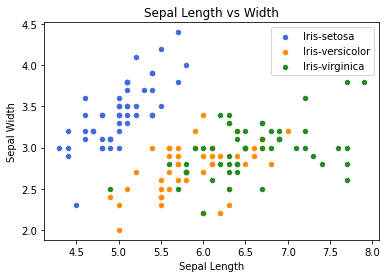

In [ ]:
fig = df[df.Species == 'Iris-setosa'].plot(kind='scatter',x='SepalLengthCm',y='SepalWidthCm',color='royalblue',label='Iris-setosa')
pf[df.Species == 'Iris-versicolor'].plot(kind='scatter',x='SepalLengthCm',y='SepalWidthCm',color='darkorange',label='Iris-versicolor',ax=fig)
pf[df.Species == 'Iris-virginica'].plot(kind='scatter',x='SepalLengthCm',y='SepalWidthCm',color='forestgreen',label='Iris-virginica',ax=fig)

fig.set_xlabel('Sepal Length')
fig.set_ylabel('Sepal Width')
fig.set_title('Sepal Length vs Width')

# **Analysing the data visually**

To understand how each feature accounts for classification of the data, we can build a scatter plot which shows us the correlation with respect to other features. This method helps just to figure out the important features which account the most for the classification in our model.

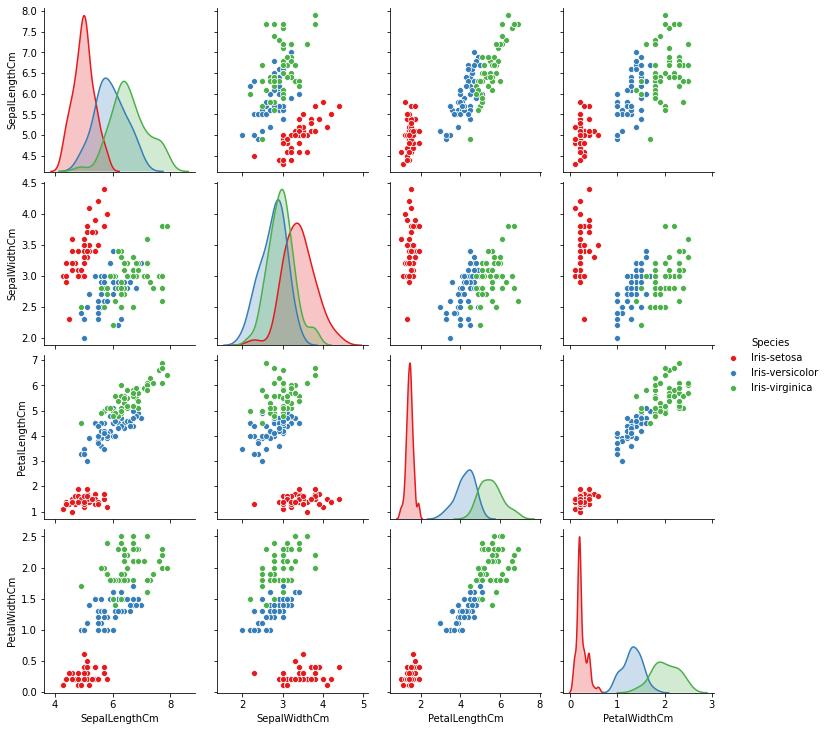

In [ ]:
sns.pairplot(pf, hue='Species',palette='Set1')

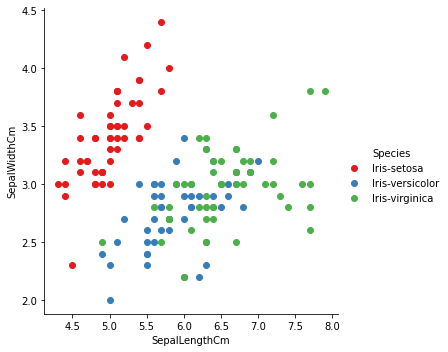

In [ ]:
sns.FacetGrid(pf, hue='Species',height=5,palette='Set1')\
.map(plt.scatter,'SepalLengthCm','SepalWidthCm')\
.add_legend()

**PETAL**

Text(0.5, 1.0, 'Petal Length vs Width')

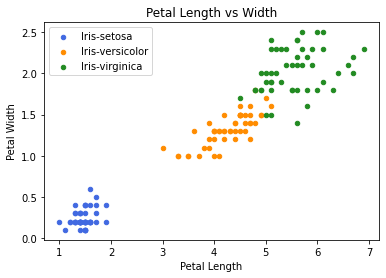

In [ ]:
fig = df[df.Species == 'Iris-setosa'].plot(kind='scatter',x='PetalLengthCm',y='PetalWidthCm',color='royalblue',label='Iris-setosa')
pf[pf.Species == 'Iris-versicolor'].plot(kind='scatter',x='PetalLengthCm',y='PetalWidthCm',color='darkorange',label='Iris-versicolor',ax=fig)
pf[pf.Species == 'Iris-virginica'].plot(kind='scatter',x='PetalLengthCm',y='PetalWidthCm',color='forestgreen',label='Iris-virginica',ax=fig)

fig.set_xlabel('Petal Length')
fig.set_ylabel('Petal Width')
fig.set_title('Petal Length vs Width')

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f07b4a120b8>,
      dtype=object)

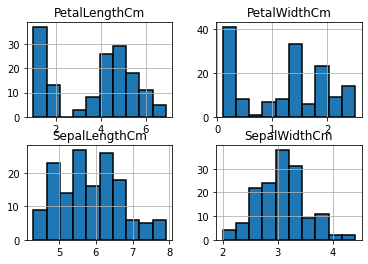

In [ ]:
pf.hist(edgecolor='black',linewidth=1.5)

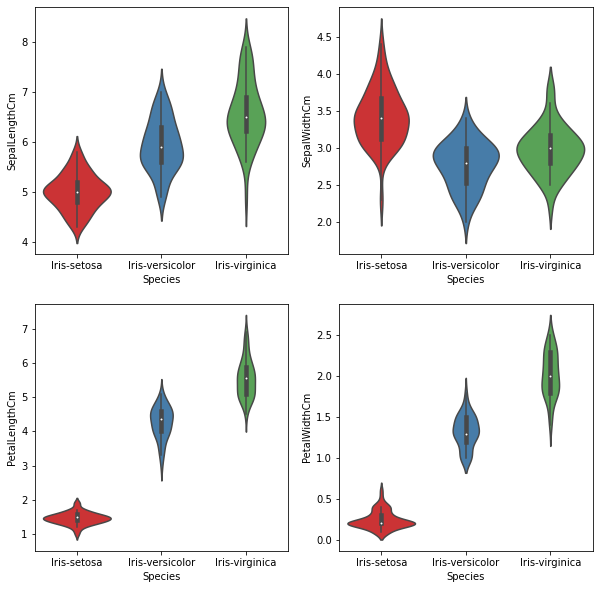

In [ ]:
plt.figure(figsize=(10,10))

plt.subplot(2,2,1)
sns.violinplot(data=pf, x='Species',y='SepalLengthCm',palette='Set1')
plt.subplot(2,2,2)
sns.violinplot(data=pf, x='Species',y='SepalWidthCm',palette='Set1')

plt.subplot(2,2,3)
sns.violinplot(data=pf,x='Species', y='PetalLengthCm',palette='Set1')
plt.subplot(2,2,4)
sns.violinplot(data=pf, x='Species', y='PetalWidthCm',palette='Set1')

# **Importing Packages for Classification algorithms**

**Scikit-learn** (formerly scikits.learn and also known as sklearn) is a free software machine learning library for the Python programming language It features various classification, regression and clustering algorithms including support vector machines, random forests, gradient boosting, k-means and DBSCAN, and is designed to interoperate with the Python numerical and scientific libraries NumPy and SciPy.

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn import svm
from sklearn import metrics
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import GaussianNB

## **Dividing the data for training and testing**

Once we have understood what the dataset is about, we can start training a model based on the algorithms.We will be using an inbuilt library called ‘train_test_split’ which divides our data set into a ratio of 70:30.

In [ ]:
X = pf[['SepalLengthCm','SepalWidthCm','PetalLengthCm','PetalWidthCm']]
y = pf['Species']

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3,random_state=0)

In [ ]:
X_train.head()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
60,5.0,2.0,3.5,1.0
116,6.5,3.0,5.5,1.8
144,6.7,3.3,5.7,2.5
119,6.0,2.2,5.0,1.5
108,6.7,2.5,5.8,1.8


In [ ]:
X_test.head()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
114,5.8,2.8,5.1,2.4
62,6.0,2.2,4.0,1.0
33,5.5,4.2,1.4,0.2
107,7.3,2.9,6.3,1.8
7,5.0,3.4,1.5,0.2


In [ ]:
y_train.head()

60     Iris-versicolor
116     Iris-virginica
144     Iris-virginica
119     Iris-virginica
108     Iris-virginica
Name: Species, dtype: object

## **Training the model**

Using some of the commonly used algorithms, we will be training our model to check how accurate every algorithm is.

# **Logistic Regression**

 Logistic Regression is used to estimate discrete values (usually binary values like 0/1) from a set of independent variables. It helps predict the probability of an event by fitting data to a logit function. It is also called logit regression.

These methods listed below are often used to help improve logistic regression models:

include interaction terms,
eliminate features,
regularize techniques,
use a non-linear model

In [ ]:
model = LogisticRegression()
model.fit(X_train,y_train)

prediction = model.predict(X_test)
print('Logistic Regression accuracy = ', metrics.accuracy_score(prediction,y_test))

Logistic Regression accuracy =  0.9777777777777777


# **Random Forest** 

Random Forest Classifier is ensemble algorithm. Ensembled algorithms are those which combines more than one algorithms of same or different kind for classifying objects.Random forest classifier creates a set of decision trees from randomly selected subset of training set. It then aggregates the votes from different decision trees to decide the final class of the test object. 


In [ ]:
model = RandomForestClassifier(n_estimators=8)
model.fit(X_train,y_train)

prediction = model.predict(X_test)
print('RandomForestClassifier accuracy = ', metrics.accuracy_score(prediction,y_test))

RandomForestClassifier accuracy =  0.9777777777777777


# **SVM(Support Vector Machine)**
“Support Vector Machine” (SVM) is a supervised machine learning algorithm which can be used for both classification or regression challenges. It is mostly used in classification problems. SVM is a method of classification in which you plot raw data as points in an n-dimensional space (where n is the number of features you have). 

In [ ]:
model = svm.SVC()
model.fit(X_train,y_train)

prediction = model.predict(X_test)
print('SVM accuracy = ', metrics.accuracy_score(prediction,y_test))

SVM accuracy =  0.9777777777777777


# **Decision Tree**
Decision Tree algorithm belongs to the family of supervised learning algorithms. Unlike other supervised learning algorithms, the decision tree algorithm can be used for solving regression and classification problems too.

The goal of using a Decision Tree is to create a training model that can use to predict the class or value of the target variable by learning simple decision rules inferred from prior data(training data).

In [ ]:
model = DecisionTreeClassifier()
model.fit(X_train,y_train)

prediction = model.predict(X_test)
print('Decision Tree accuracy = ', metrics.accuracy_score(prediction,y_test))

Decision Tree accuracy =  0.9777777777777777


# **KNN (K-Nearest Neighbors)**
K-Nearest Neighbour is one of the simplest Machine Learning algorithms based on Supervised Learning technique.
K-NN algorithm assumes the similarity between the new case/data and available cases and put the new case into the category that is most similar to the available categories.
K-NN algorithm stores all the available data and classifies a new data point based on the similarity. This means when new data appears then it can be easily classified into a well suite category by using K- NN algorithm.

In [ ]:
model = KNeighborsClassifier()
model.fit(X_train,y_train)

prediction = model.predict(X_test)
print('KNN accuracy = ', metrics.accuracy_score(prediction,y_test))

KNN accuracy =  0.9777777777777777


# **Naive Bayes**
Naive Bayes is a simple but surprisingly powerful algorithm for predictive modeling.Naive Bayes is a classification algorithm for binary (two-class) and multi-class classification problems.It is called naive Bayes or idiot Bayes because the calculation of the probabilities for each hypothesis are simplified to make their calculation tractable.

In [ ]:
model = GaussianNB()
model.fit(X_train,y_train)

prediction = model.predict(X_test)
print(' accuracy = ', metrics.accuracy_score(prediction,y_test))

 accuracy =  1.0


# **Conclusion**:
In ML, there is no specific model or an algorithm which can give 100% result to every single dataset. We need to understand the data before we apply any algorithm and build our model depending on the desired result. 
By applying the above Machine Learning algorithms, we see that all our models give the exact same High Accuracy of .9777 but Naive Bayes gives optimal accuracy i.e 1.0 compared to other algorithms .